# Quiz 02:

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def line_from_points(p1, p2):
    """Return slope (m) and intercept (b) of a line passing through two points."""
    # y = mx + c => c = y - mx
    if p1[0] == p2[0]:
        # Vertical line: slope undefined
        return None, p1[0]
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = p1[1] - m * p1[0]
    return m, c


def line_equation_form(p1, p2, above=True):
    """Return line coefficients (A, B, C) for the form A*x + B*y + C = 0."""
    m, b = line_from_points(p1, p2)
    if m is None:
        # Vertical line: x = b form
        return [-1, 0, b] if above else [1, 0, -b]

    # Choose orientation (above vs below)
    if above:
        A, B, C = -m, 1, -b
    else:
        A, B, C = m, -1, b
    return [A, B, C]


In [25]:
def step(x):
    return 1 if x >= 0 else 0


def neuron(x, w, b):
    """Compute neuron output using step activation."""
    return step(np.dot(x, w) + b)


In [75]:
def visualize_perceptron(
        perceptron,
        limit=7,
        n_points=50,
        resolution=300,
        title="Decision Region Formed by Multiple Neurons",
        highlight="both",
):
    """
    Visualizes the decision region formed by a perceptron that outputs 0/1.

    Parameters:
    -----------
    perceptron : callable
        Function that takes a 2D point (x, y) or np.array([x, y]) and returns 0 or 1.
    limit : float
        Plot limit for x and y axes.
    n_points : int
        Number of random test points to generate and display.
    resolution : int
        Grid resolution for contour visualization.
    title : str
        Plot title.
    highlight : str or None
        Which regions to color:
        - 'both': highlight both 0 and 1 regions
        - '1': highlight only the region where output == 1
        - '0': highlight only the region where output == 0
        - None: no filled regions
    """

    # Generate random test points
    points = np.random.randint(-limit, limit, size=(n_points, 2))
    outputs = np.array([perceptron(p) for p in points])

    # Create a mesh grid
    x = np.linspace(-limit, limit, resolution)
    y = np.linspace(-limit, limit, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.array(
        [
            [perceptron((xx, yy)) for xx, yy in zip(row_x, row_y)]
            for row_x, row_y in zip(X, Y)
        ]
    )

    # Plot setup
    plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=14, pad=15)

    # Plot decision boundary line
    plt.contour(X, Y, Z, levels=[0], colors=["green"], linewidths=2)

    # Conditionally fill regions
    if highlight in ("both", "1"):
        plt.contourf(X, Y, Z, levels=[0.5, 1.5], colors=["yellow"], alpha=0.5)
    if highlight in ("both", "0"):
        plt.contourf(X, Y, Z, levels=[-0.5, 0.5], colors=["red"], alpha=0.5)

    # Scatter random test points
    # plt.scatter(
    #     points[:, 0], points[:, 1], c=outputs, cmap="bwr_r", s=20, edgecolors="k"
    # )

    # Labeling & axes
    plt.xlabel("x", loc="right")
    plt.ylabel("y", loc="top")
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.grid(alpha=0.3)

    # Center axes visually
    ax = plt.gca()
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    plt.show()


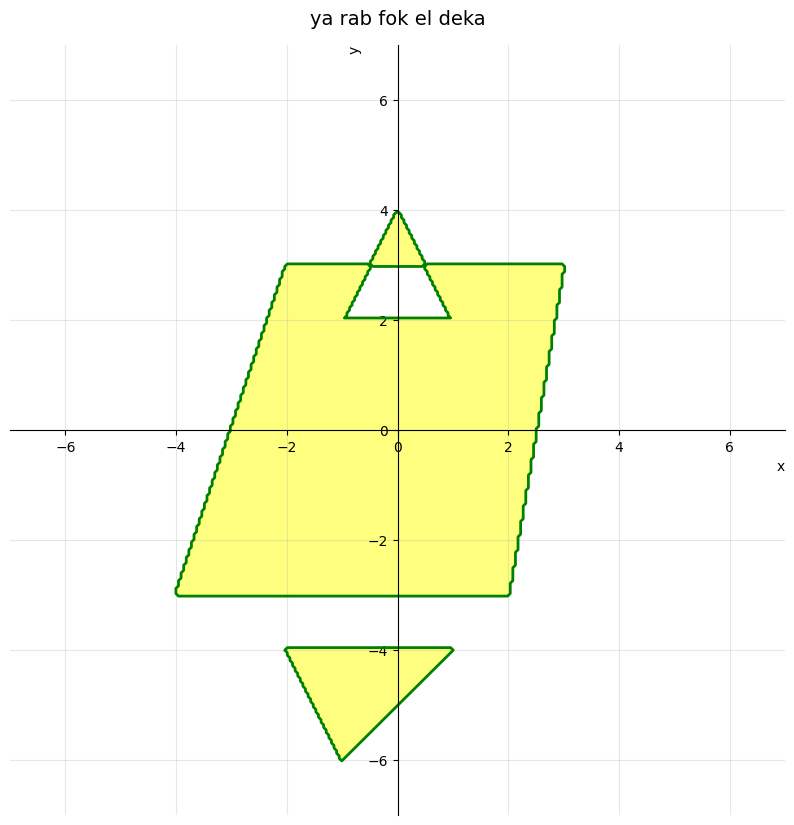

In [76]:
def quiz(x):
    """Combine multiple neurons to define a diamond shape region."""
    # Triangle
    L1 = line_equation_form((0, 4), (1, 2), above=False)
    L2 = line_equation_form((1, 2), (-1, 2), above=True)
    L3 = line_equation_form((-1, 2), (0, 4), above=False)

    # shape
    L4 = line_equation_form((-2, 3), (3, 3), above=False)
    L6 = line_equation_form((2, -3), (-4, -3), above=True)
    L5 = line_equation_form((3, 3), (2, -3), above=True)
    L7 = line_equation_form((-4, -3), (-2, 3), above=False)

    # last triangle
    L8 = line_equation_form((-2, -4), (1, -4), above=False)
    L9 = line_equation_form((-2, -4), (-1, -6), above=True)
    L10 = line_equation_form((-1, -6), (1, -4), above=True)



    # Compute which side of each line the point lies on
    n1 = neuron(x, L1[:2], L1[2])
    n2 = neuron(x, L2[:2], L2[2])
    n3 = neuron(x, L3[:2], L3[2])
    n4 = neuron(np.array([n1, n2, n3]), np.array([1, 1, 1]), -3)

    n5 = neuron(x, L4[:2], L4[2])
    n6 = neuron(x, L5[:2], L5[2])
    n7 = neuron(x, L6[:2], L6[2])
    n8 = neuron(x, L7[:2], L7[2])
    n9 = neuron(np.array([n5, n6, n7, n8]), np.array([1, 1, 1, 1]), -4)

    n10 = n4 ^ n9

    #
    n11 = neuron(x, L8[:2], L8[2])
    n12 = neuron(x, L9[:2], L9[2])
    n13 = neuron(x, L10[:2], L10[2])
    n14 = neuron(np.array([n11, n12, n13]), np.array([1, 1, 1]), -3)

    n15 = neuron(np.array([n10, n14]), np.array([1, 1]), -1)
    return n15


visualize_perceptron(quiz, highlight="1", title="ya rab fok el deka", limit=7)